In [53]:
from time import perf_counter
import numpy as np

def setup():
    global photo
    
    size(100, 100)

    photo = load_image("../lennaG.gif")
    photo.load_np_pixels()

    time_start = perf_counter()
    
    # We start with a grayscale image, so red = green = blue for each pixel
    # We can take any color composent, here I take blue
    array_blue = photo.np_pixels[..., 3].astype(int)
   
    # Calculate max "white" value and min "black" value present in the image
    max_gray, min_gray = np.max(array_blue), np.min(array_blue)
    print(f'{max_gray=}, {min_gray=}')
    
    # The threshold is the average of these two values
    thres = (max_gray + min_gray) // 2
    print(f'{thres=}')
    
    # Naive version of the Floyd & Steinberg algorithm
    for y in range(array_blue.shape[0]):
        for x in range(array_blue.shape[1]):
            # W
            if (array_blue[y, x] > thres):
                err = array_blue[y, x] - max_gray
                array_blue[y, x] = 0xFF
            else:
                err = array_blue[y, x] - min_gray
                array_blue[y, x] = 0x00
                
            if (x + 1 < array_blue.shape[1]):
                array_blue[y, x+1] = array_blue[y, x+1] + err * 3/8
            if (y + 1 < array_blue.shape[0]):
                array_blue[y+1, x] = array_blue[y+1, x] + err * 3/8
            if (x + 1 < array_blue.shape[1]) and (y + 1 < array_blue.shape[0]):
                array_blue[y+1, x+1] = array_blue[y+1, x+1] + err * 2/8      
                
    array_blue = array_blue.astype(np.uint8)
    
    # Array full of 0xFF
    ff_array = np.full((photo.height, photo.width), 0xFF)
    # We stack the arrays to obtain [0xFF, val, val, val]
    result_array = np.stack((ff_array, array_blue, array_blue, array_blue), axis=2)
    # Create image from the updated numpy array
    create_image_from_numpy(result_array, 'ARGB', dst = photo)
    
    time_end = perf_counter()
    print(f'Took {time_end - time_start:.3f} seconds')
    
    # Resize the window to the size of the image to be displayed
    window_resize(photo.width, photo.height)
    
    no_loop()
    
def draw():    
    image(photo, 0, 0)
    save_frame("./floyd_steinberg_0001.png", use_thread=True) 
    
run_sketch()

max_gray=248, min_gray=44
thres=146
Took 0.785 seconds


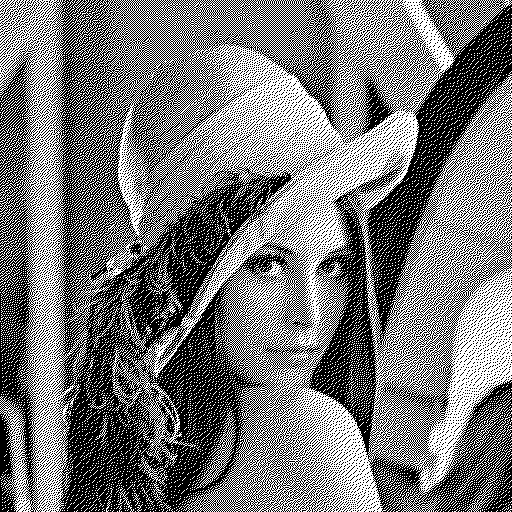